## W3- End-to-End Insurance Risk Analytics & Predictive Modeling


#### Tadele Bizuye

### 1. Intilizing The Data

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Correctly read the pipe-delimited file
df = pd.read_csv("C:/Users/TadeleBizuye/OneDrive - esxethiopia/Desktop/AI/MachineLearningRating_v3.txt", delimiter="|")

# Preview the data
print(df.head())

C:\Users\TadeleBizuye\AppData\Local\Temp\ipykernel_21392\3211490122.py:6: DtypeWarning: Columns (32,37) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("C:/Users/TadeleBizuye/OneDrive - esxethiopia/Desktop/AI/MachineLearningRating_v3.txt", delimiter="|")


   UnderwrittenCoverID  PolicyID     TransactionMonth  IsVATRegistered  \
0               145249     12827  2015-03-01 00:00:00             True   
1               145249     12827  2015-05-01 00:00:00             True   
2               145249     12827  2015-07-01 00:00:00             True   
3               145255     12827  2015-05-01 00:00:00             True   
4               145255     12827  2015-07-01 00:00:00             True   

  Citizenship          LegalType Title Language                 Bank  \
0              Close Corporation    Mr  English  First National Bank   
1              Close Corporation    Mr  English  First National Bank   
2              Close Corporation    Mr  English  First National Bank   
3              Close Corporation    Mr  English  First National Bank   
4              Close Corporation    Mr  English  First National Bank   

       AccountType  ...                    ExcessSelected CoverCategory  \
0  Current account  ...             Mobility - 

In [12]:
print(df.info())
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000098 entries, 0 to 1000097
Data columns (total 52 columns):
 #   Column                    Non-Null Count    Dtype  
---  ------                    --------------    -----  
 0   UnderwrittenCoverID       1000098 non-null  int64  
 1   PolicyID                  1000098 non-null  int64  
 2   TransactionMonth          1000098 non-null  object 
 3   IsVATRegistered           1000098 non-null  bool   
 4   Citizenship               1000098 non-null  object 
 5   LegalType                 1000098 non-null  object 
 6   Title                     1000098 non-null  object 
 7   Language                  1000098 non-null  object 
 8   Bank                      854137 non-null   object 
 9   AccountType               959866 non-null   object 
 10  MaritalStatus             991839 non-null   object 
 11  Gender                    990562 non-null   object 
 12  Country                   1000098 non-null  object 
 13  Province                  1

### 2. Loss Ratio Analysis

In [13]:
# Create Loss Ratio column
df['LossRatio'] = df['TotalClaims'] / df['TotalPremium']

# Average Loss Ratio overall
overall_lr = df['LossRatio'].mean()

# Group by Province, VehicleType, Gender
by_province = df.groupby('Province')['LossRatio'].mean().sort_values(ascending=False)
by_vehicle = df.groupby('VehicleType')['LossRatio'].mean().sort_values(ascending=False)
by_gender = df.groupby('Gender')['LossRatio'].mean().sort_values(ascending=False)

print("Overall Loss Ratio:", overall_lr)
print("Loss Ratio by Province:\n", by_province)
print("Loss Ratio by Vehicle Type:\n", by_vehicle)
print("Loss Ratio by Gender:\n", by_gender)

Overall Loss Ratio: nan
Loss Ratio by Province:
 Province
Eastern Cape          inf
Free State            inf
KwaZulu-Natal         inf
Limpopo               inf
North West            inf
Western Cape          inf
Northern Cape    0.203831
Gauteng               NaN
Mpumalanga            NaN
Name: LossRatio, dtype: float64
Loss Ratio by Vehicle Type:
 VehicleType
Bus                       inf
Heavy Commercial          inf
Medium Commercial         inf
Light Commercial     0.543917
Passenger Vehicle         NaN
Name: LossRatio, dtype: float64
Loss Ratio by Gender:
 Gender
Female           inf
Male             inf
Not specified    NaN
Name: LossRatio, dtype: float64


c:\Users\TadeleBizuye\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\_core\_methods.py:53: RuntimeWarning: invalid value encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims, initial, where)


### 1.3: Outlier Detection

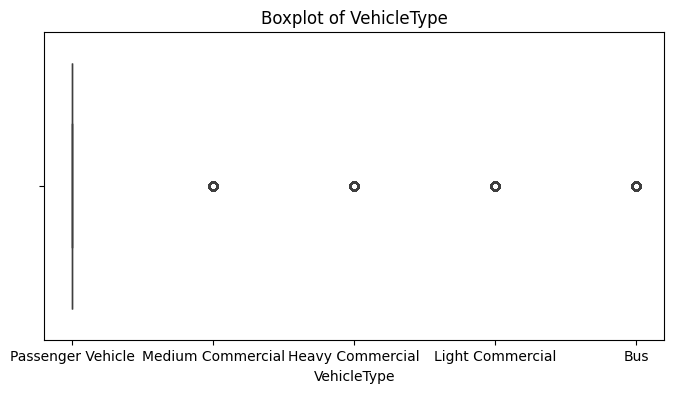

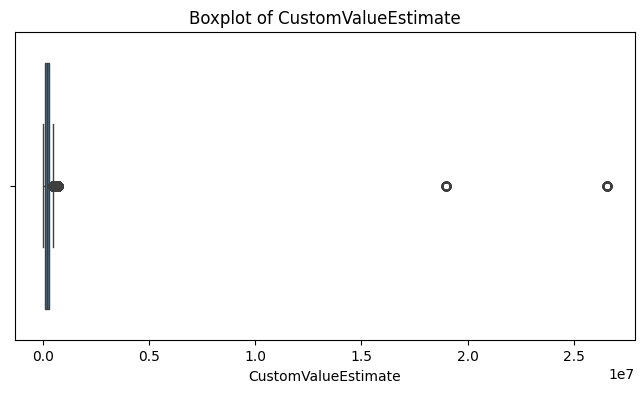

In [18]:
# Define the financial columns we want to check
financial_cols = ['VehicleType', 'CustomValueEstimate']

# Boxplot for outlier detection
for col in financial_cols:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')
    plt.xlabel(col)
    plt.show()

### 1.4: Trends Over Time

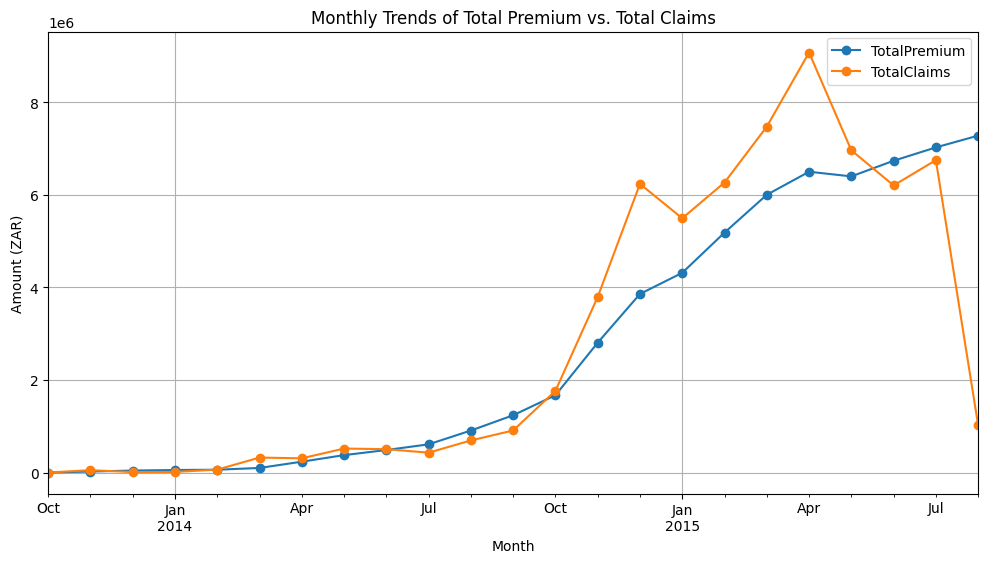

In [20]:
# Convert 'TransactionMonth' to datetime format
df['TransactionMonth'] = pd.to_datetime(df['TransactionMonth'], errors='coerce')

# Now you can use .dt safely
df['Month'] = df['TransactionMonth'].dt.month
df['Year'] = df['TransactionMonth'].dt.year

# Example: Plot TotalClaims by Month
import matplotlib.pyplot as plt

monthly_trends = df.groupby(df['TransactionMonth'].dt.to_period("M"))[['TotalPremium', 'TotalClaims']].sum()
monthly_trends.index = monthly_trends.index.to_timestamp()

monthly_trends.plot(kind='line', figsize=(12,6), marker='o')
plt.title("Monthly Trends of Total Premium vs. Total Claims")
plt.ylabel("Amount (ZAR)")
plt.xlabel("Month")
plt.grid(True)
plt.show()

### 1.5: Top Vehicles by Claim Amount

In [23]:
vehicle_claims = df.groupby(['make', 'Model'])['TotalClaims'].sum().sort_values(ascending=False).head(10)
print(vehicle_claims)

make           Model                           
TOYOTA         QUANTUM 2.7 SESFIKILE 16s           1.203750e+07
               QUANTUM 2.7 SESFIKILE 15s           1.151173e+07
               QUANTUM 2.7 SESFIKILE 14s           9.967764e+06
               QUANTUM 2.5 D-4D SESFIKILE 16s      7.733236e+06
               HiACE SUPER 16 F/Lift               3.275205e+06
               HiACE SIYAYA                        1.727756e+06
               QUANTUM 2.5 D-4D 14 SEAT            1.339541e+06
CMC            AMANDLA 2.2                         1.106007e+06
TOYOTA         AVANZA 1.5 SX                       1.089785e+06
MERCEDES-BENZ  SPRINTER 515 CDi HI-ROOF F/C P/V    8.874161e+05
Name: TotalClaims, dtype: float64


## 3: Hypothesis Testing (A/B Testing)

### Example: Risk by Province (H₀: No difference)

In [26]:
from scipy.stats import f_oneway

# Drop NaNs
province_df = df[['Province', 'TotalClaims']].dropna()

# Group values
groups = [g['TotalClaims'].values for name, g in province_df.groupby('Province')]

# ANOVA
stat, p = f_oneway(*groups)
print("ANOVA Test for Provinces - p-value:", p)
if p < 0.05:
    print("Reject H₀: Provinces show risk differences.")
else:
    print("Fail to reject H₀.")

ANOVA Test for Provinces - p-value: 1.6782057588675903e-07
Reject H₀: Provinces show risk differences.


###  Risk by Gender (T-test)

In [27]:
from scipy.stats import ttest_ind

male_claims = df[df['Gender'] == 'Male']['TotalClaims'].dropna()
female_claims = df[df['Gender'] == 'Female']['TotalClaims'].dropna()

stat, p = ttest_ind(male_claims, female_claims, equal_var=False)
print("T-test for Gender - p-value:", p)
if p < 0.05:
    print("Reject H₀: Gender shows risk differences.")
else:
    print("Fail to reject H₀.")

T-test for Gender - p-value: 0.7669656471629474
Fail to reject H₀.
